## Accumulate Local Effects (ALE) Documentation

This notebook demonstrates how to use `mintpy` to compute 1D or 2D ALE and plot the results. For more information on the dataset and initializing `InterpretToolkit`, see the permutatation importance notebook.

In [1]:
import sys, os 
current_dir = os.getcwd()
path = os.path.dirname(current_dir)
sys.path.append(path)

In [2]:
import mintpy
import plotting_config

### Loading the training data and pre-fit models 

In [3]:
model_objs, model_names = mintpy.load_models()
examples, targets = mintpy.load_data()

### Loading permutation importance results

To limit the scope of our analysis, we can start by only computing the ALE for the most important features

In [4]:
myInterpreter = mintpy.InterpretToolkit(models=model_objs,
                                 model_names=model_names,
                                 examples=examples,
                                 targets=targets,
                                )

# Load the permutation important results from the saved pickle file
results = myInterpreter.load_results(fnames='multipass_importance_naupdc.nc',)

# We can use a bulit-in function that will extract the top predictors from all the model
# remove any duplicate features to produce a single list. In this case, we want the top 7 features
important_vars = myInterpreter.get_important_vars(results, multipass=True, n_vars=7)

OrderedDict([('Random Forest', RandomForestClassifier(min_samples_leaf=5, n_estimators=200, n_jobs=5)), ('Gradient Boosting', GradientBoostingClassifier()), ('Logistic Regression', LogisticRegression(C=1))]) ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
<xarray.Dataset>
Dimensions:                                   (n_bootstrap: 5, n_vars_multipass: 10, n_vars_singlepass: 30)
Dimensions without coordinates: n_bootstrap, n_vars_multipass, n_vars_singlepass
Data variables:
    multipass_rankings__Random Forest         (n_vars_multipass) object ...
    multipass_scores__Random Forest           (n_vars_multipass, n_bootstrap) float64 ...
    singlepass_rankings__Random Forest        (n_vars_singlepass) object ...
    singlepass_scores__Random Forest          (n_vars_singlepass, n_bootstrap) float64 ...
    original_score__Random Forest             (n_bootstrap) float64 ...
    multipass_rankings__Gradient Boosting     (n_vars_multipass) object ...
    multipass_scores__Grad

### Plotting 1D ALE

Below is an example of 1D ALE plots for the top predictors. 


In [5]:
important_vars = ['sfcT_hrs_bl_frez','sfc_temp', 'uplwav_flux']
results = myInterpreter.calc_ale(features=important_vars, 
                                 n_bootstrap=1, 
                                 subsample=20000, 
                                 n_jobs=len(important_vars)*len(model_objs), 
                                 n_bins=20
                                )

In [6]:
results

<xarray.Dataset>
Dimensions:                                     (n_bins__sfcT_hrs_bl_frez: 12, n_bins__sfc_temp: 20, n_bins__uplwav_flux: 20, n_bootstrap: 1, n_examples: 100000)
Dimensions without coordinates: n_bins__sfcT_hrs_bl_frez, n_bins__sfc_temp, n_bins__uplwav_flux, n_bootstrap, n_examples
Data variables:
    uplwav_flux__Random Forest__ale             (n_bootstrap, n_bins__uplwav_flux) float64 ...
    uplwav_flux__bin_values                     (n_bins__uplwav_flux) float64 ...
    sfc_temp__Random Forest__ale                (n_bootstrap, n_bins__sfc_temp) float64 ...
    uplwav_flux__Logistic Regression__ale       (n_bootstrap, n_bins__uplwav_flux) float64 ...
    uplwav_flux                                 (n_examples) float64 302.8 .....
    sfcT_hrs_bl_frez__Gradient Boosting__ale    (n_bootstrap, n_bins__sfcT_hrs_bl_frez) float64 ...
    sfc_temp__Gradient Boosting__ale            (n_bootstrap, n_bins__sfc_temp) float64 ...
    sfcT_hrs_bl_frez__Logistic Regression__ale  (n_bootstrap, n_bins__sfcT_hrs_bl_frez) float64 ...
    sfc_temp__Logistic Regression__ale          (n_bootstrap, n_bins__sfc_temp) float64 ...
    sfcT_hrs_bl_frez__bin_values                (n_bins__sfcT_hrs_bl_frez) float64 ...
    sfcT_hrs_bl_frez__Random Forest__ale        (n_bootstrap, n_bins__sfcT_hrs_bl_frez) float64 ...
    sfcT_hrs_bl_frez                            (n_examples) float64 4.0 ... 0.0
    sfc_temp                                    (n_examples) float64 -2.871 ....
    uplwav_flux__Gradient Boosting__ale         (n_bootstrap, n_bins__uplwav_flux) float64 ...
    sfc_temp__bin_values                        (n_bins__sfc_temp) float64 -2...
Attributes:
    model_output:  probability
    models used:   ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
    method:        ale
    dimension:     1D

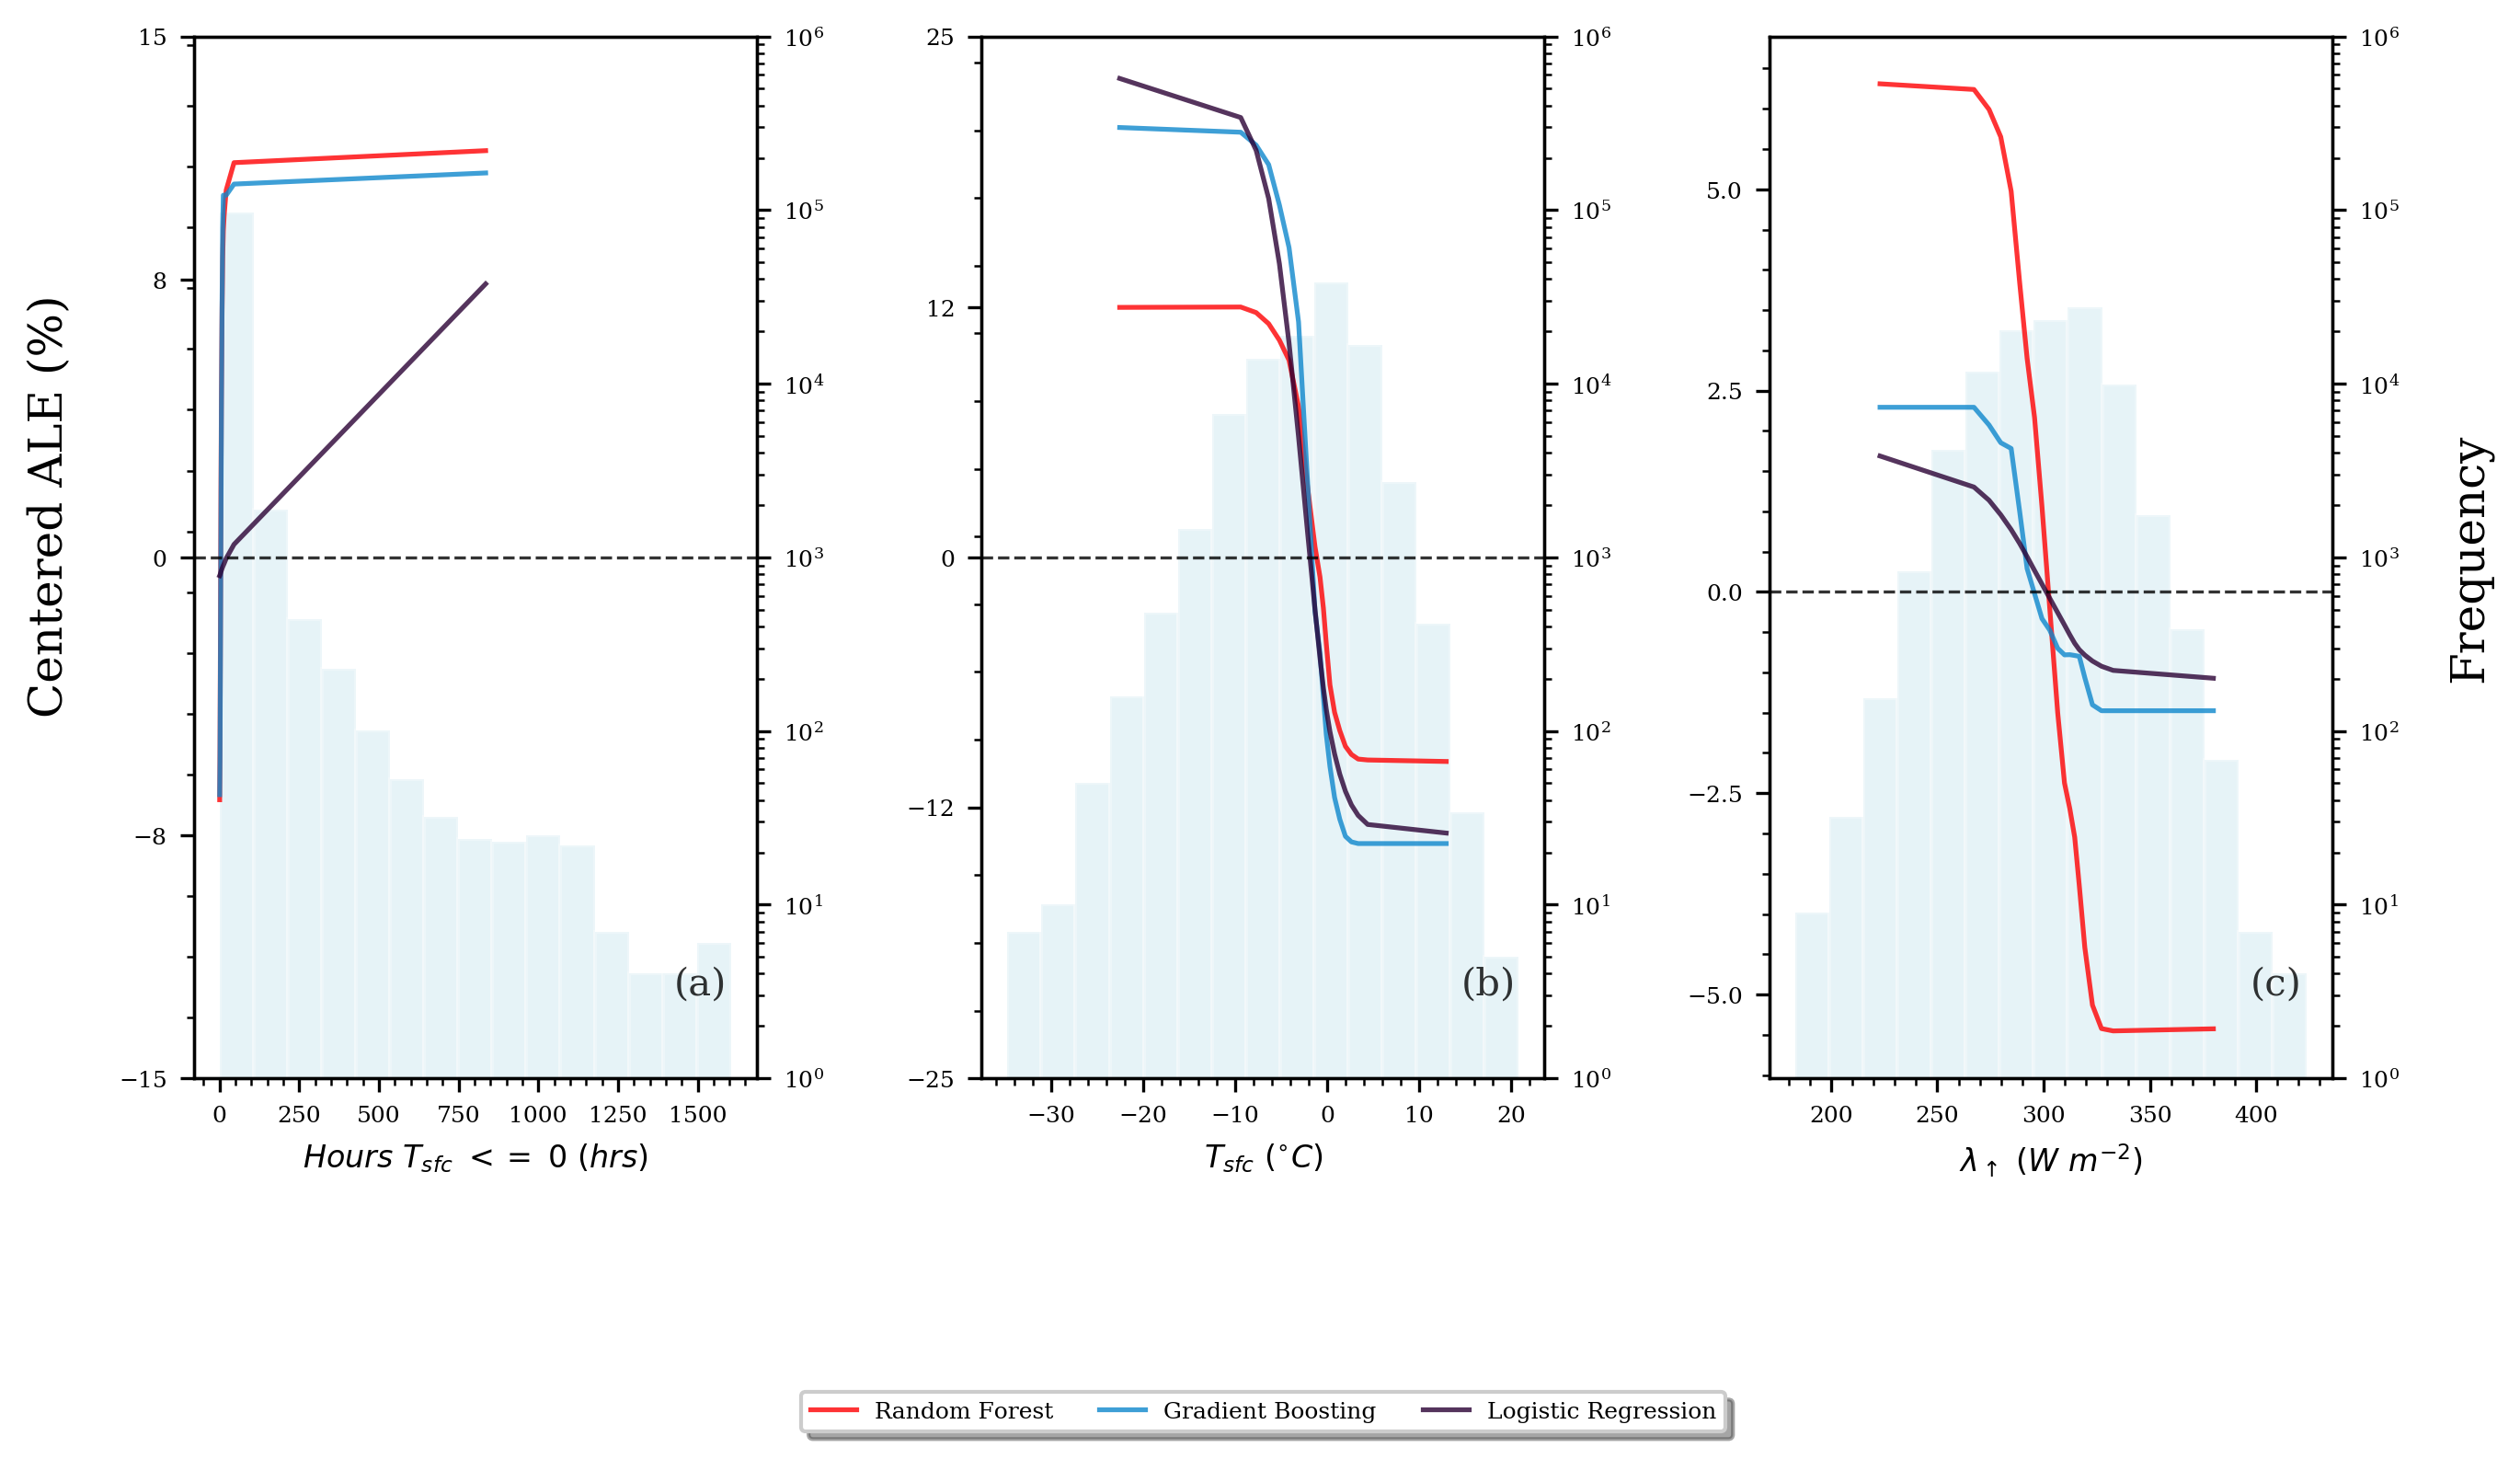

In [7]:
fig, axes = myInterpreter.plot_ale(display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

The light blue histogram in the background is the distribution of values the ALE was computed over. In instances where the distribution poorly samples particular phase space we should have less confident in the ALE value. 

### Modifying line colors 

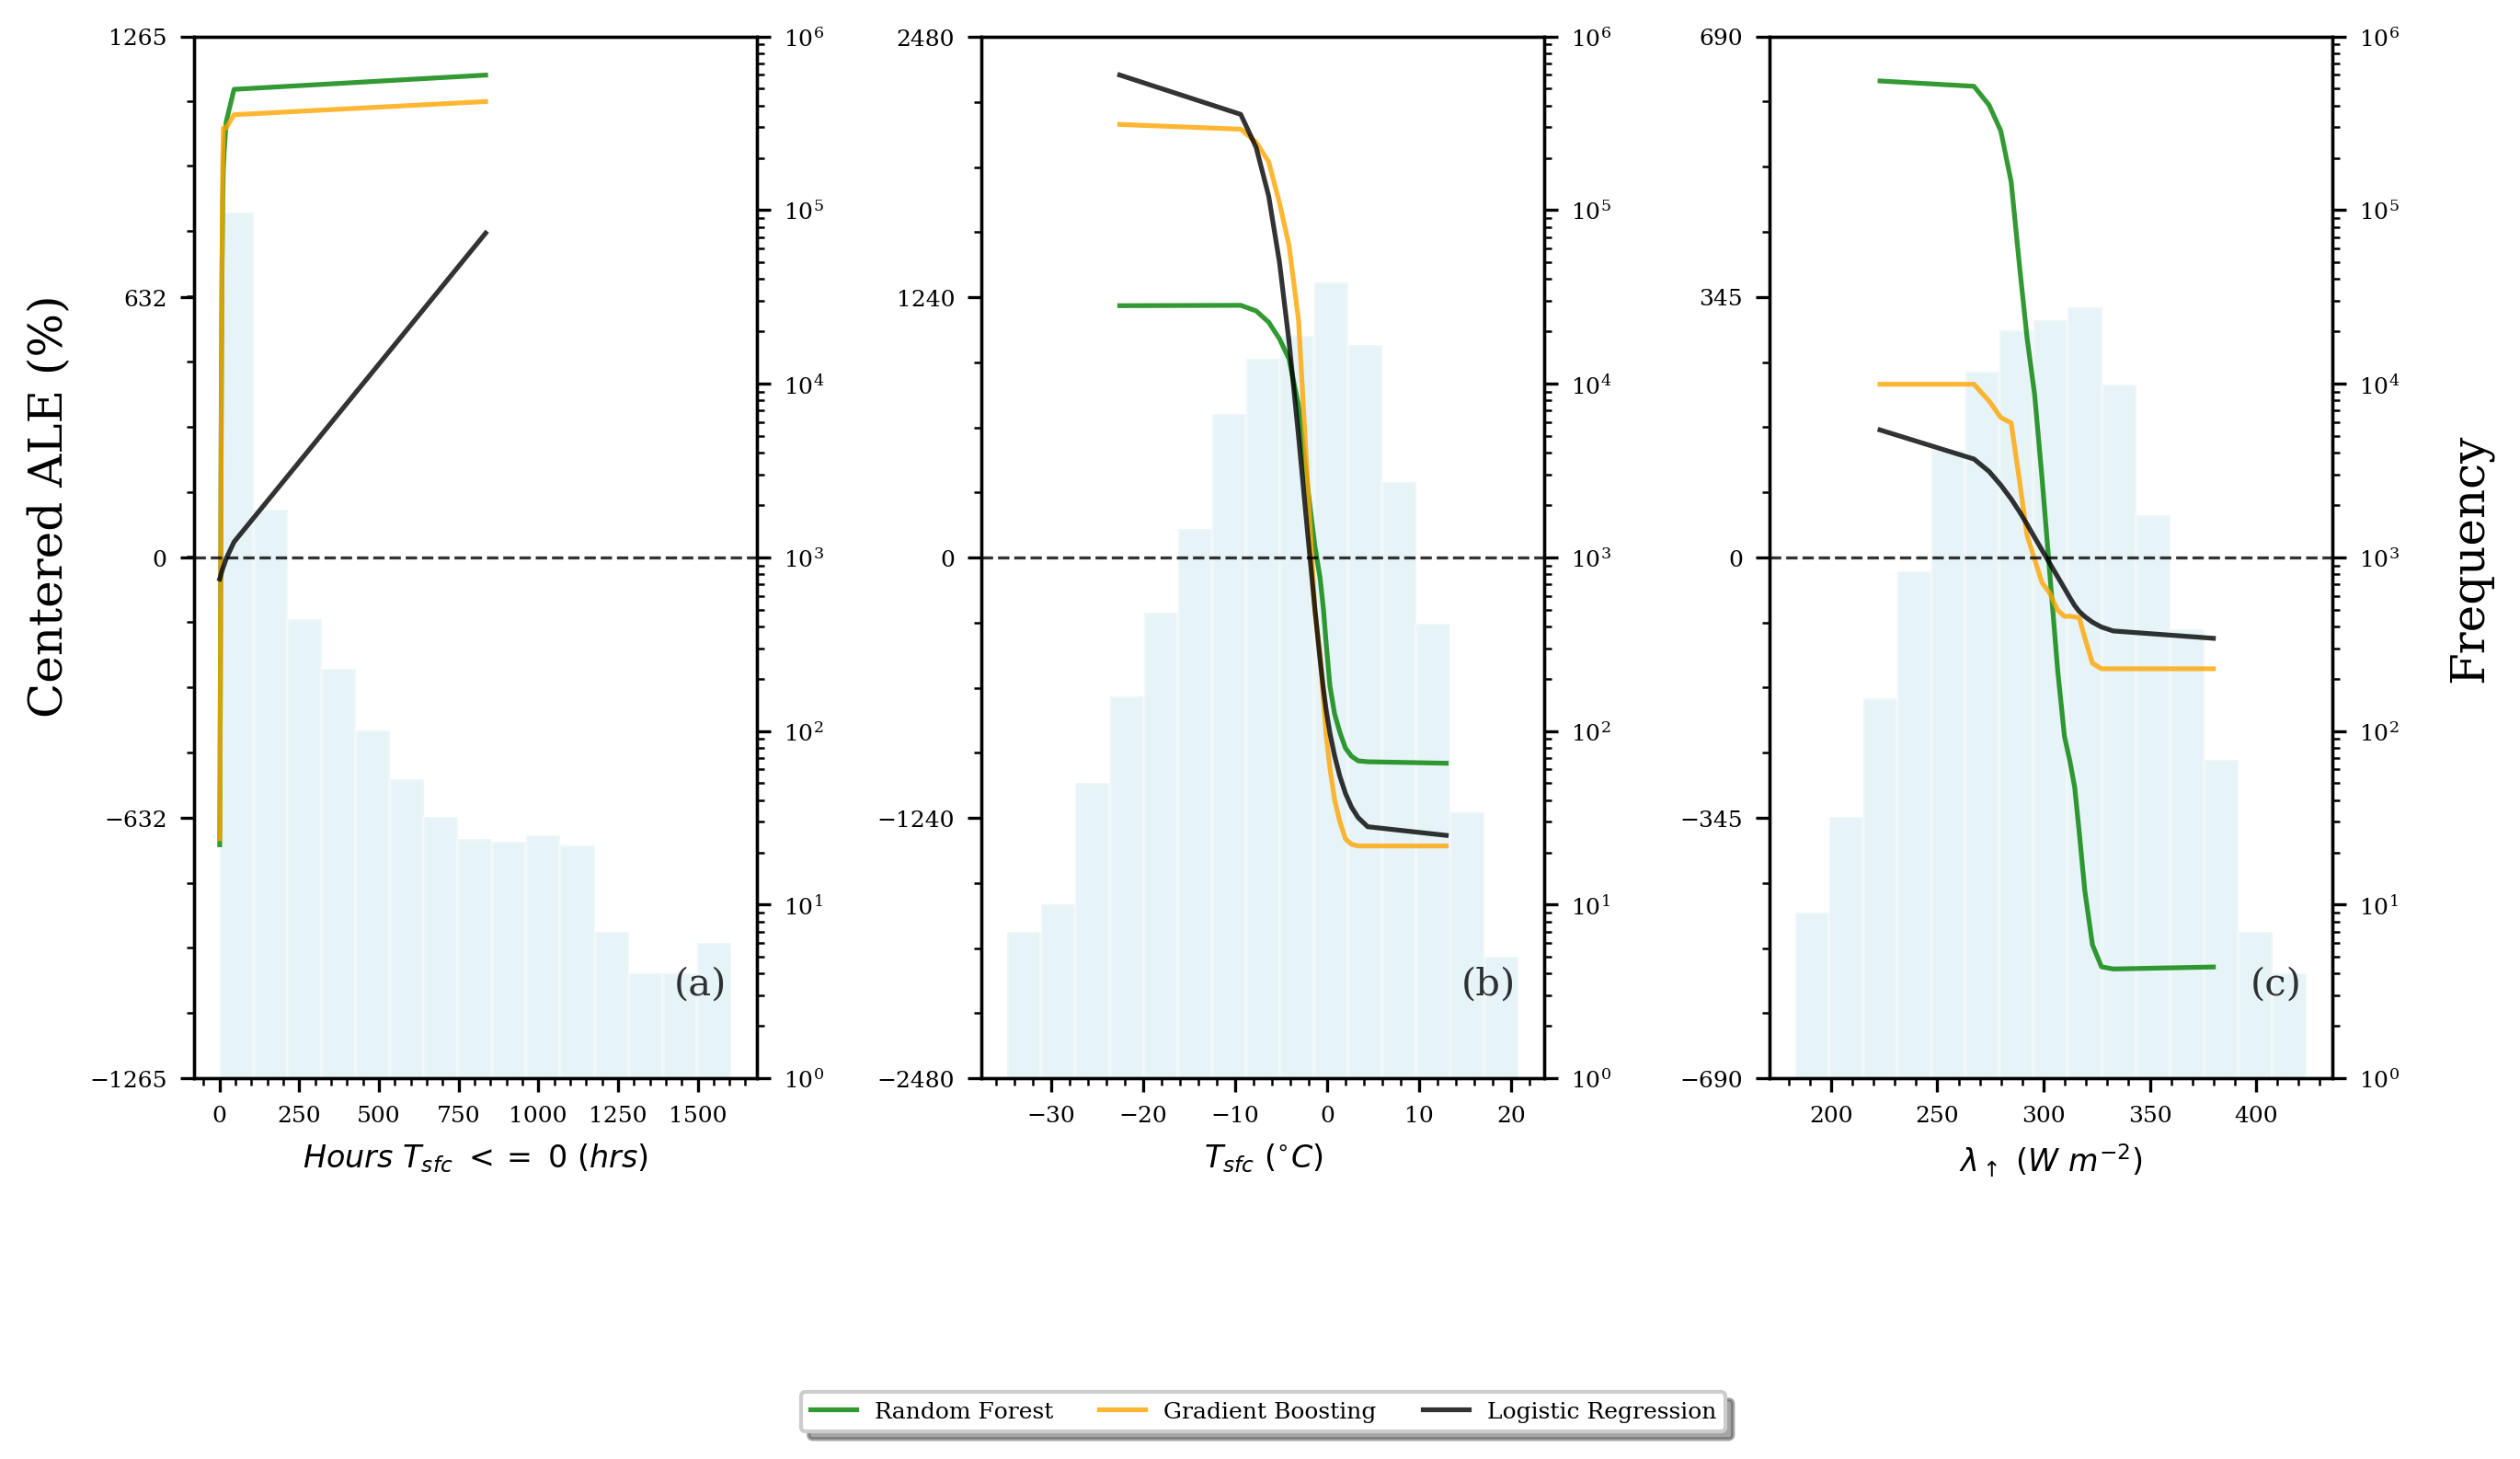

In [8]:
fig, axes = myInterpreter.plot_ale(display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                   line_colors = ['g', 'orange', 'k']
                                  )

### Including bootstrapping for confidence intervals

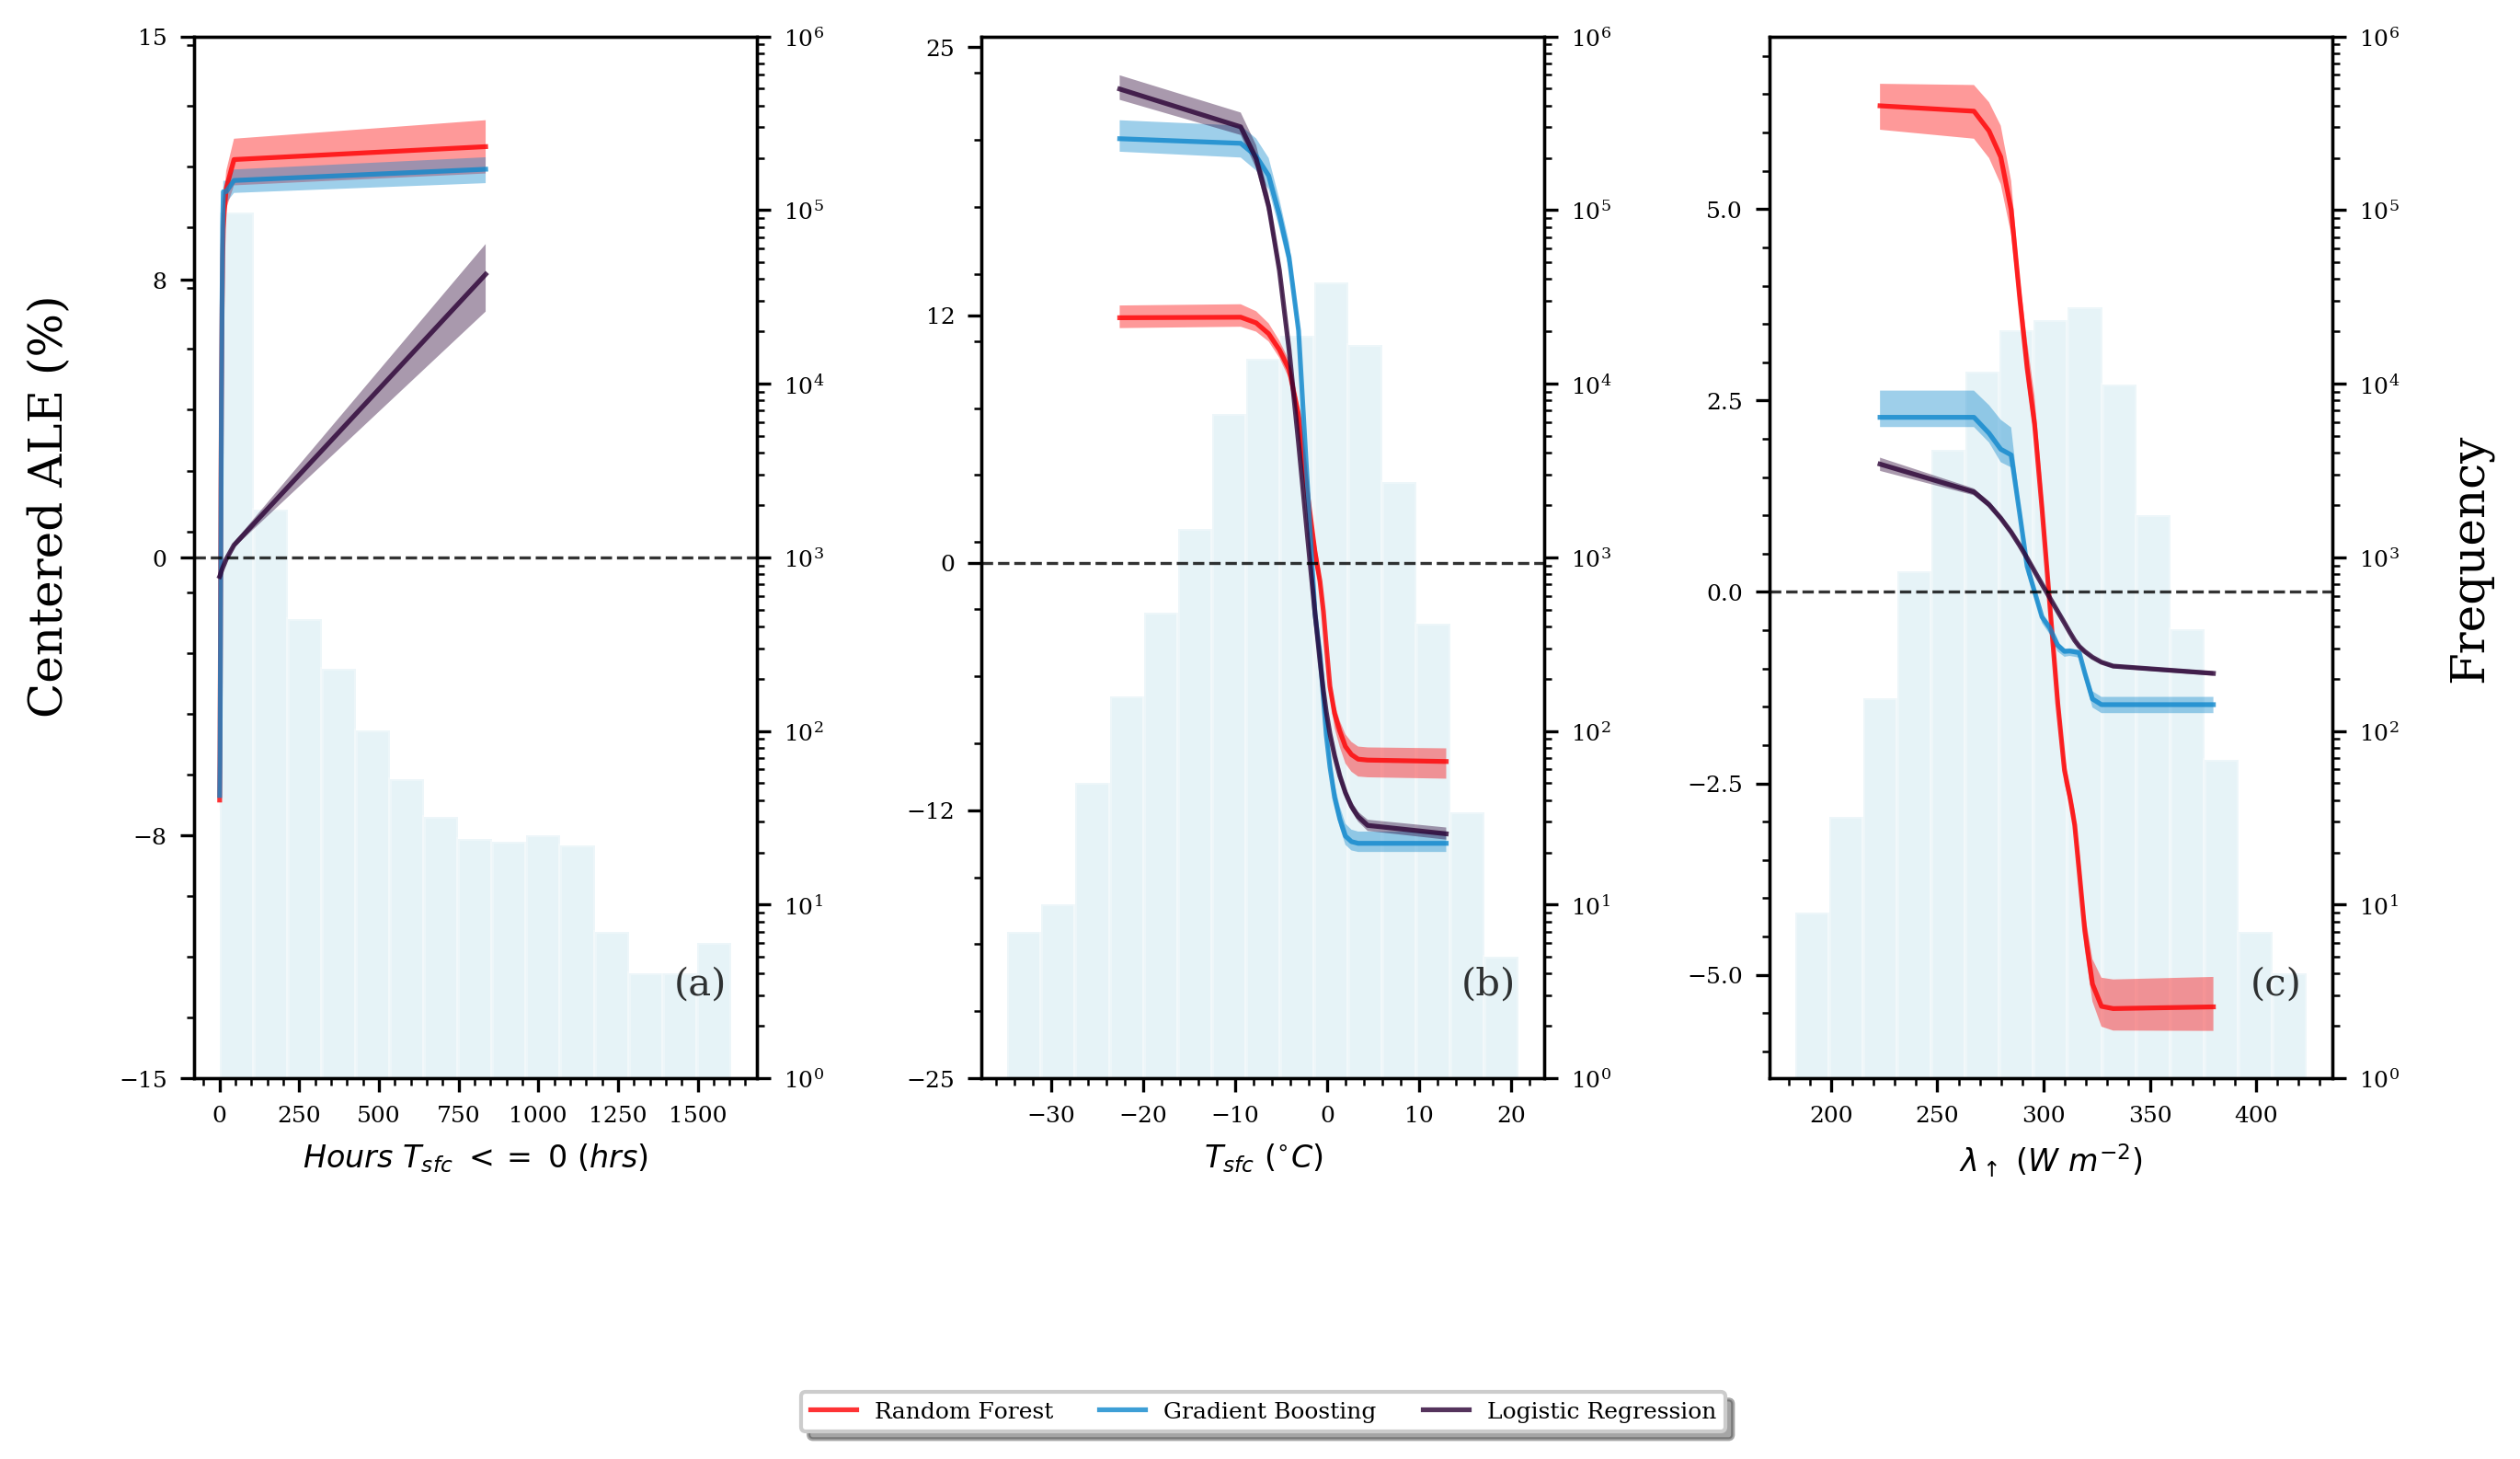

In [9]:
results = myInterpreter.calc_ale(features=important_vars, 
                                 n_bootstrap=10, 
                                 subsample=3000, 
                                 n_jobs=len(important_vars)*len(model_objs), 
                                 n_bins=20
                                )
fig, axes = myInterpreter.plot_ale(display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

### Plotting 2D ALE 

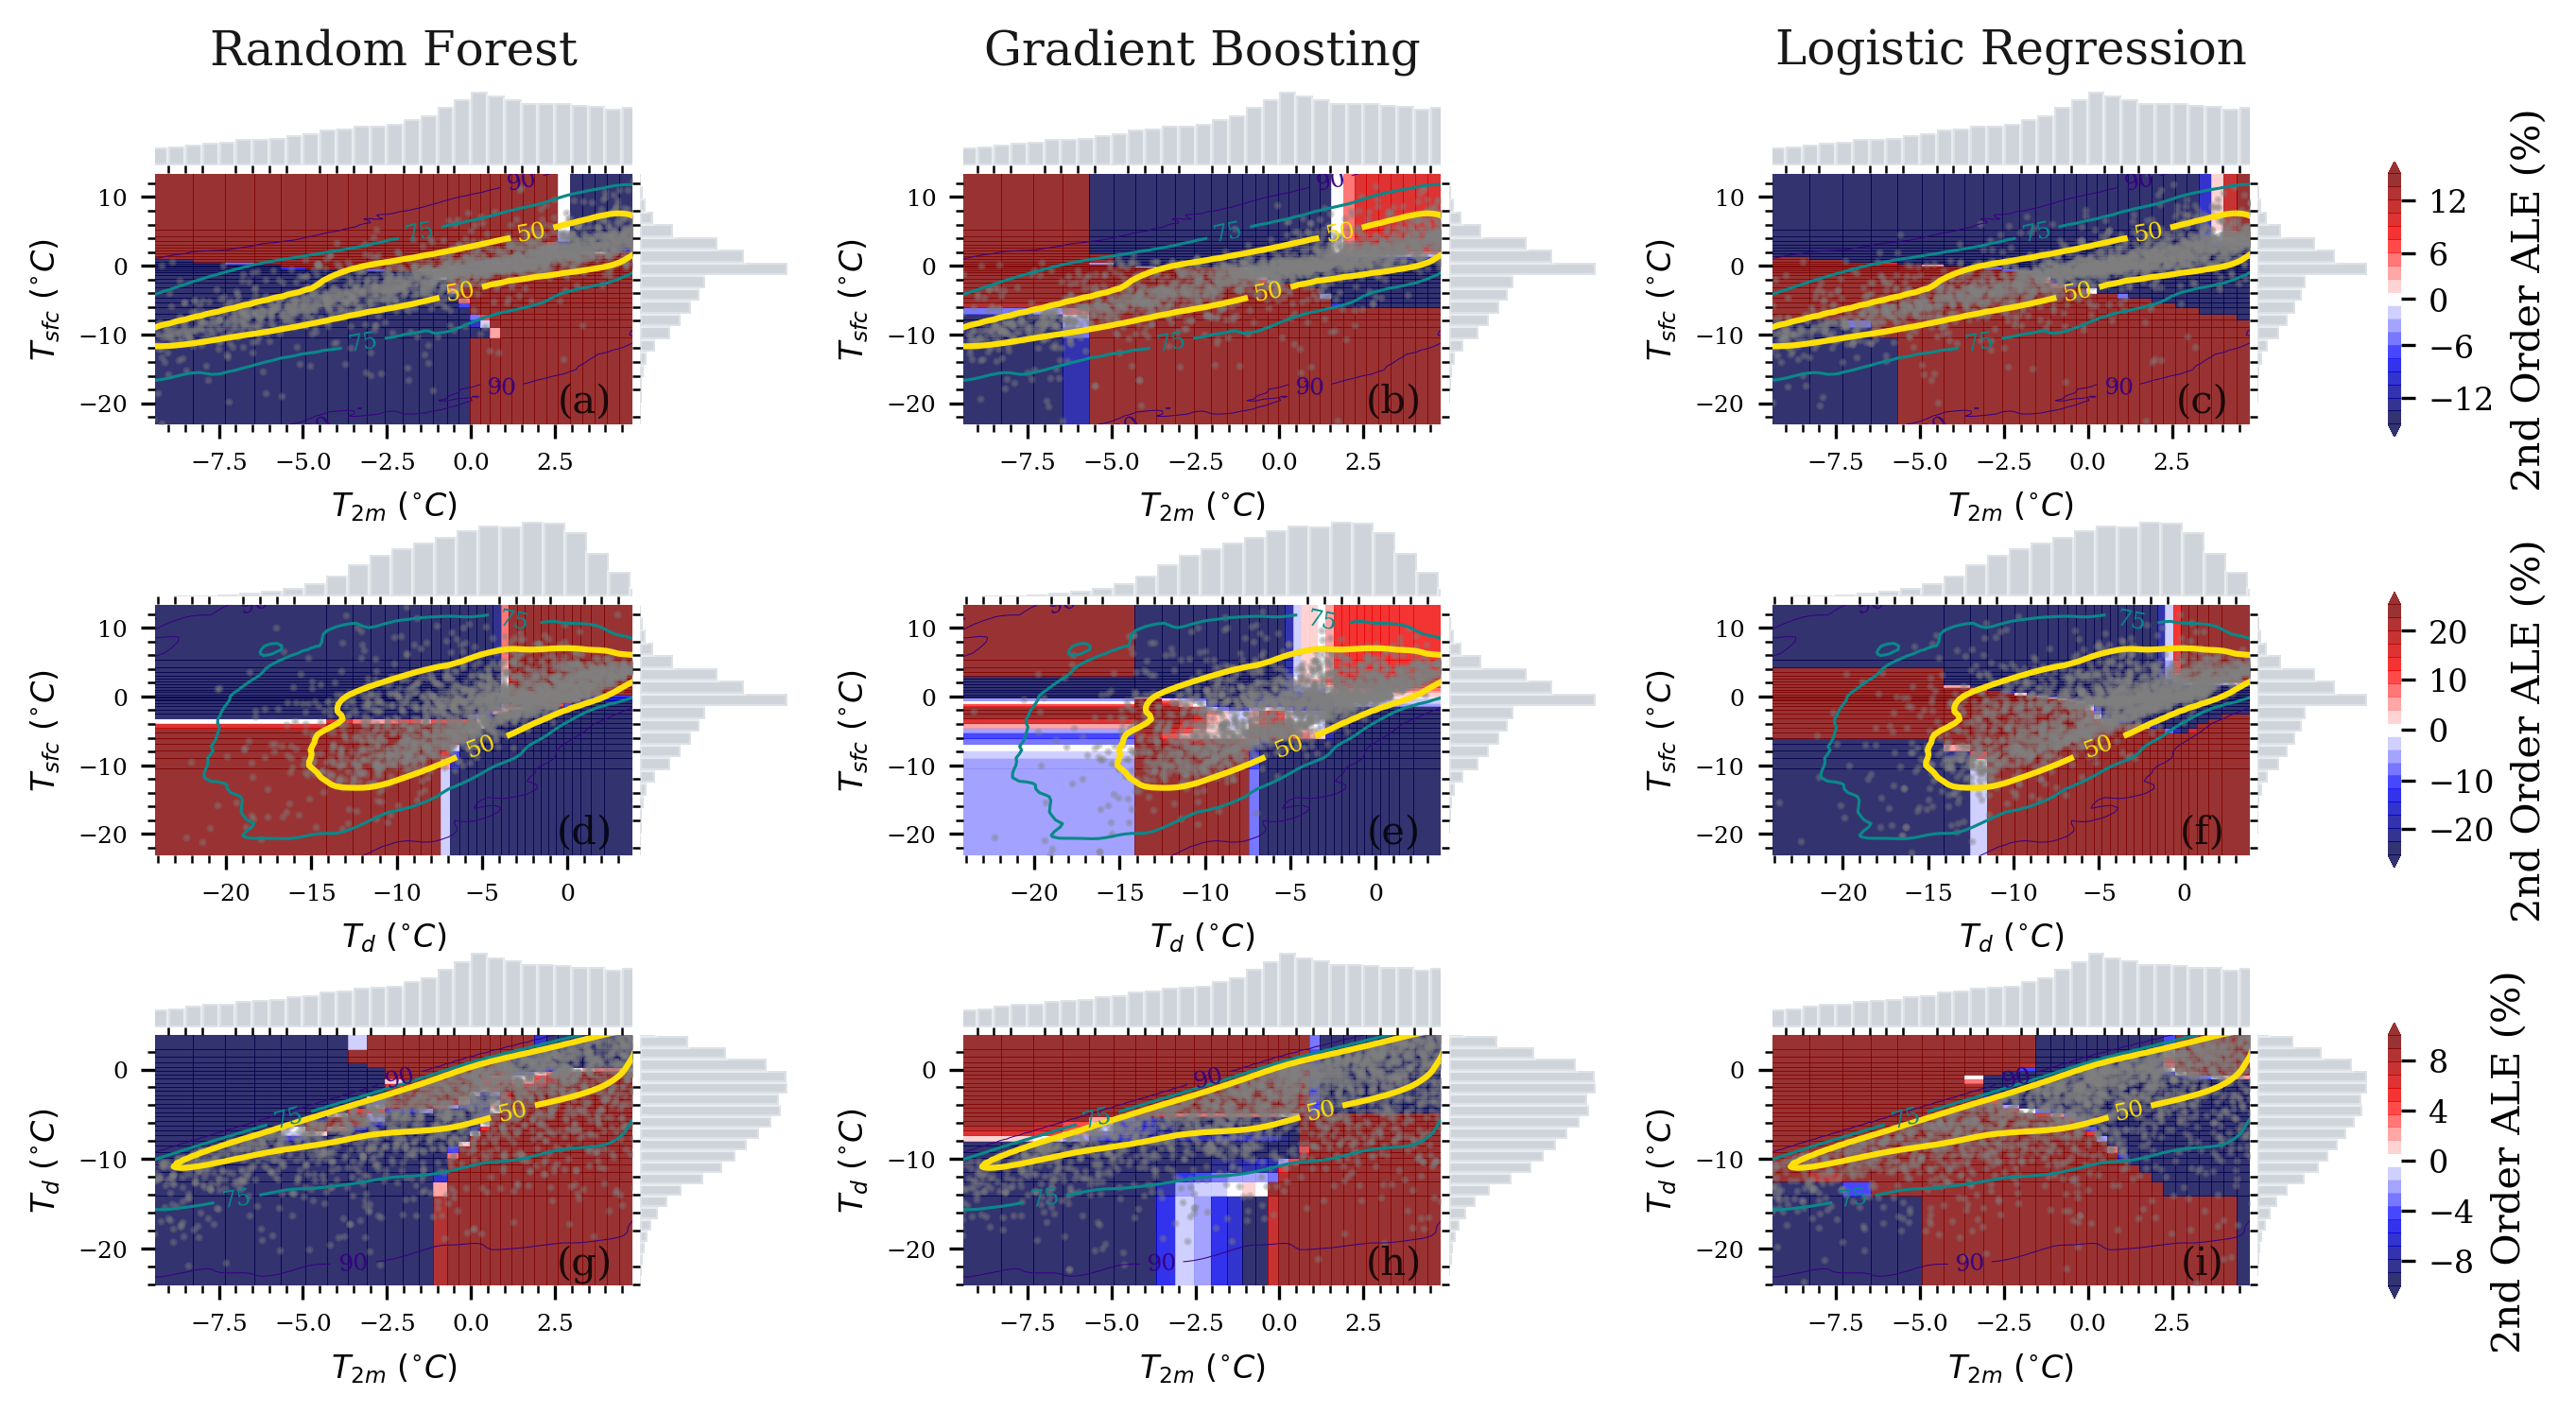

In [10]:
features=[('temp2m', 'sfc_temp'), ('dwpt2m', 'sfc_temp'), ('temp2m', 'dwpt2m')]
results = myInterpreter.calc_ale(features=features, 
                                 n_bootstrap=1, 
                                 subsample=1.0,
                                 n_jobs=len(features)*len(model_names),
                                 n_bins=30
                                )

fig, axes = myInterpreter.plot_ale(display_units=plotting_config.display_units,
                                   display_feature_names=plotting_config.display_feature_names,
                                  )

In [11]:
results

<xarray.Dataset>
Dimensions:                                     (n_bins__dwpt2m: 30, n_bins__sfc_temp: 30, n_bins__temp2m: 30, n_binssfc_temp: 30, n_bootstrap: 1, n_examples: 100000)
Dimensions without coordinates: n_bins__dwpt2m, n_bins__sfc_temp, n_bins__temp2m, n_binssfc_temp, n_bootstrap, n_examples
Data variables:
    temp2m__dwpt2m__Gradient Boosting__ale      (n_bootstrap, n_bins__temp2m, n_bins__dwpt2m) float64 ...
    dwpt2m__bin_values                          (n_bins__dwpt2m) float64 -24....
    dwpt2m__sfc_temp__Gradient Boosting__ale    (n_bootstrap, n_bins__dwpt2m, n_bins__sfc_temp) float64 ...
    temp2m__dwpt2m__Logistic Regression__ale    (n_bootstrap, n_bins__temp2m, n_bins__dwpt2m) float64 ...
    temp2m__sfc_temp__Gradient Boosting__ale    (n_bootstrap, n_bins__temp2m, n_bins__sfc_temp) float64 ...
    dwpt2m                                      (n_examples) float64 -2.504 ....
    temp2m__bin_values                          (n_bins__temp2m) float64 -9.3...
    temp2m__sfc_temp__Logistic Regression__ale  (n_bootstrap, n_bins__temp2m, n_bins__sfc_temp) float64 ...
    temp2m                                      (n_examples) float64 -1.909 ....
    dwpt2m__sfc_temp__Logistic Regression__ale  (n_bootstrap, n_bins__dwpt2m, n_bins__sfc_temp) float64 ...
    dwpt2m__sfc_temp__Random Forest__ale        (n_bootstrap, n_bins__dwpt2m, n_bins__sfc_temp) float64 ...
    temp2m__dwpt2m__Random Forest__ale          (n_bootstrap, n_bins__temp2m, n_bins__dwpt2m) float64 ...
    sfc_temp                                    (n_examples) float64 -2.871 ....
    temp2m__sfc_temp__Random Forest__ale        (n_bootstrap, n_bins__temp2m, n_bins__sfc_temp) float64 ...
    sfc_temp__bin_values                        (n_binssfc_temp) float64 -23....
Attributes:
    model_output:  probability
    models used:   ['Random Forest', 'Gradient Boosting', 'Logistic Regression']
    method:        ale
    dimension:     2D

## ALE for Regression Problems

In [12]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor

In [13]:
data = fetch_california_housing()
X = data['data']
y = data['target']
feature_names = data['feature_names']
clf = RandomForestRegressor()
clf.fit(X,y)

RandomForestRegressor()

In [14]:
myInterpreter = mintpy.InterpretToolkit(models=clf,
                                 model_names='Random Forest',
                                 examples=X,
                                 targets=y,
                                 feature_names = feature_names
                                )

OrderedDict([('Random Forest', RandomForestRegressor())]) ['Random Forest']


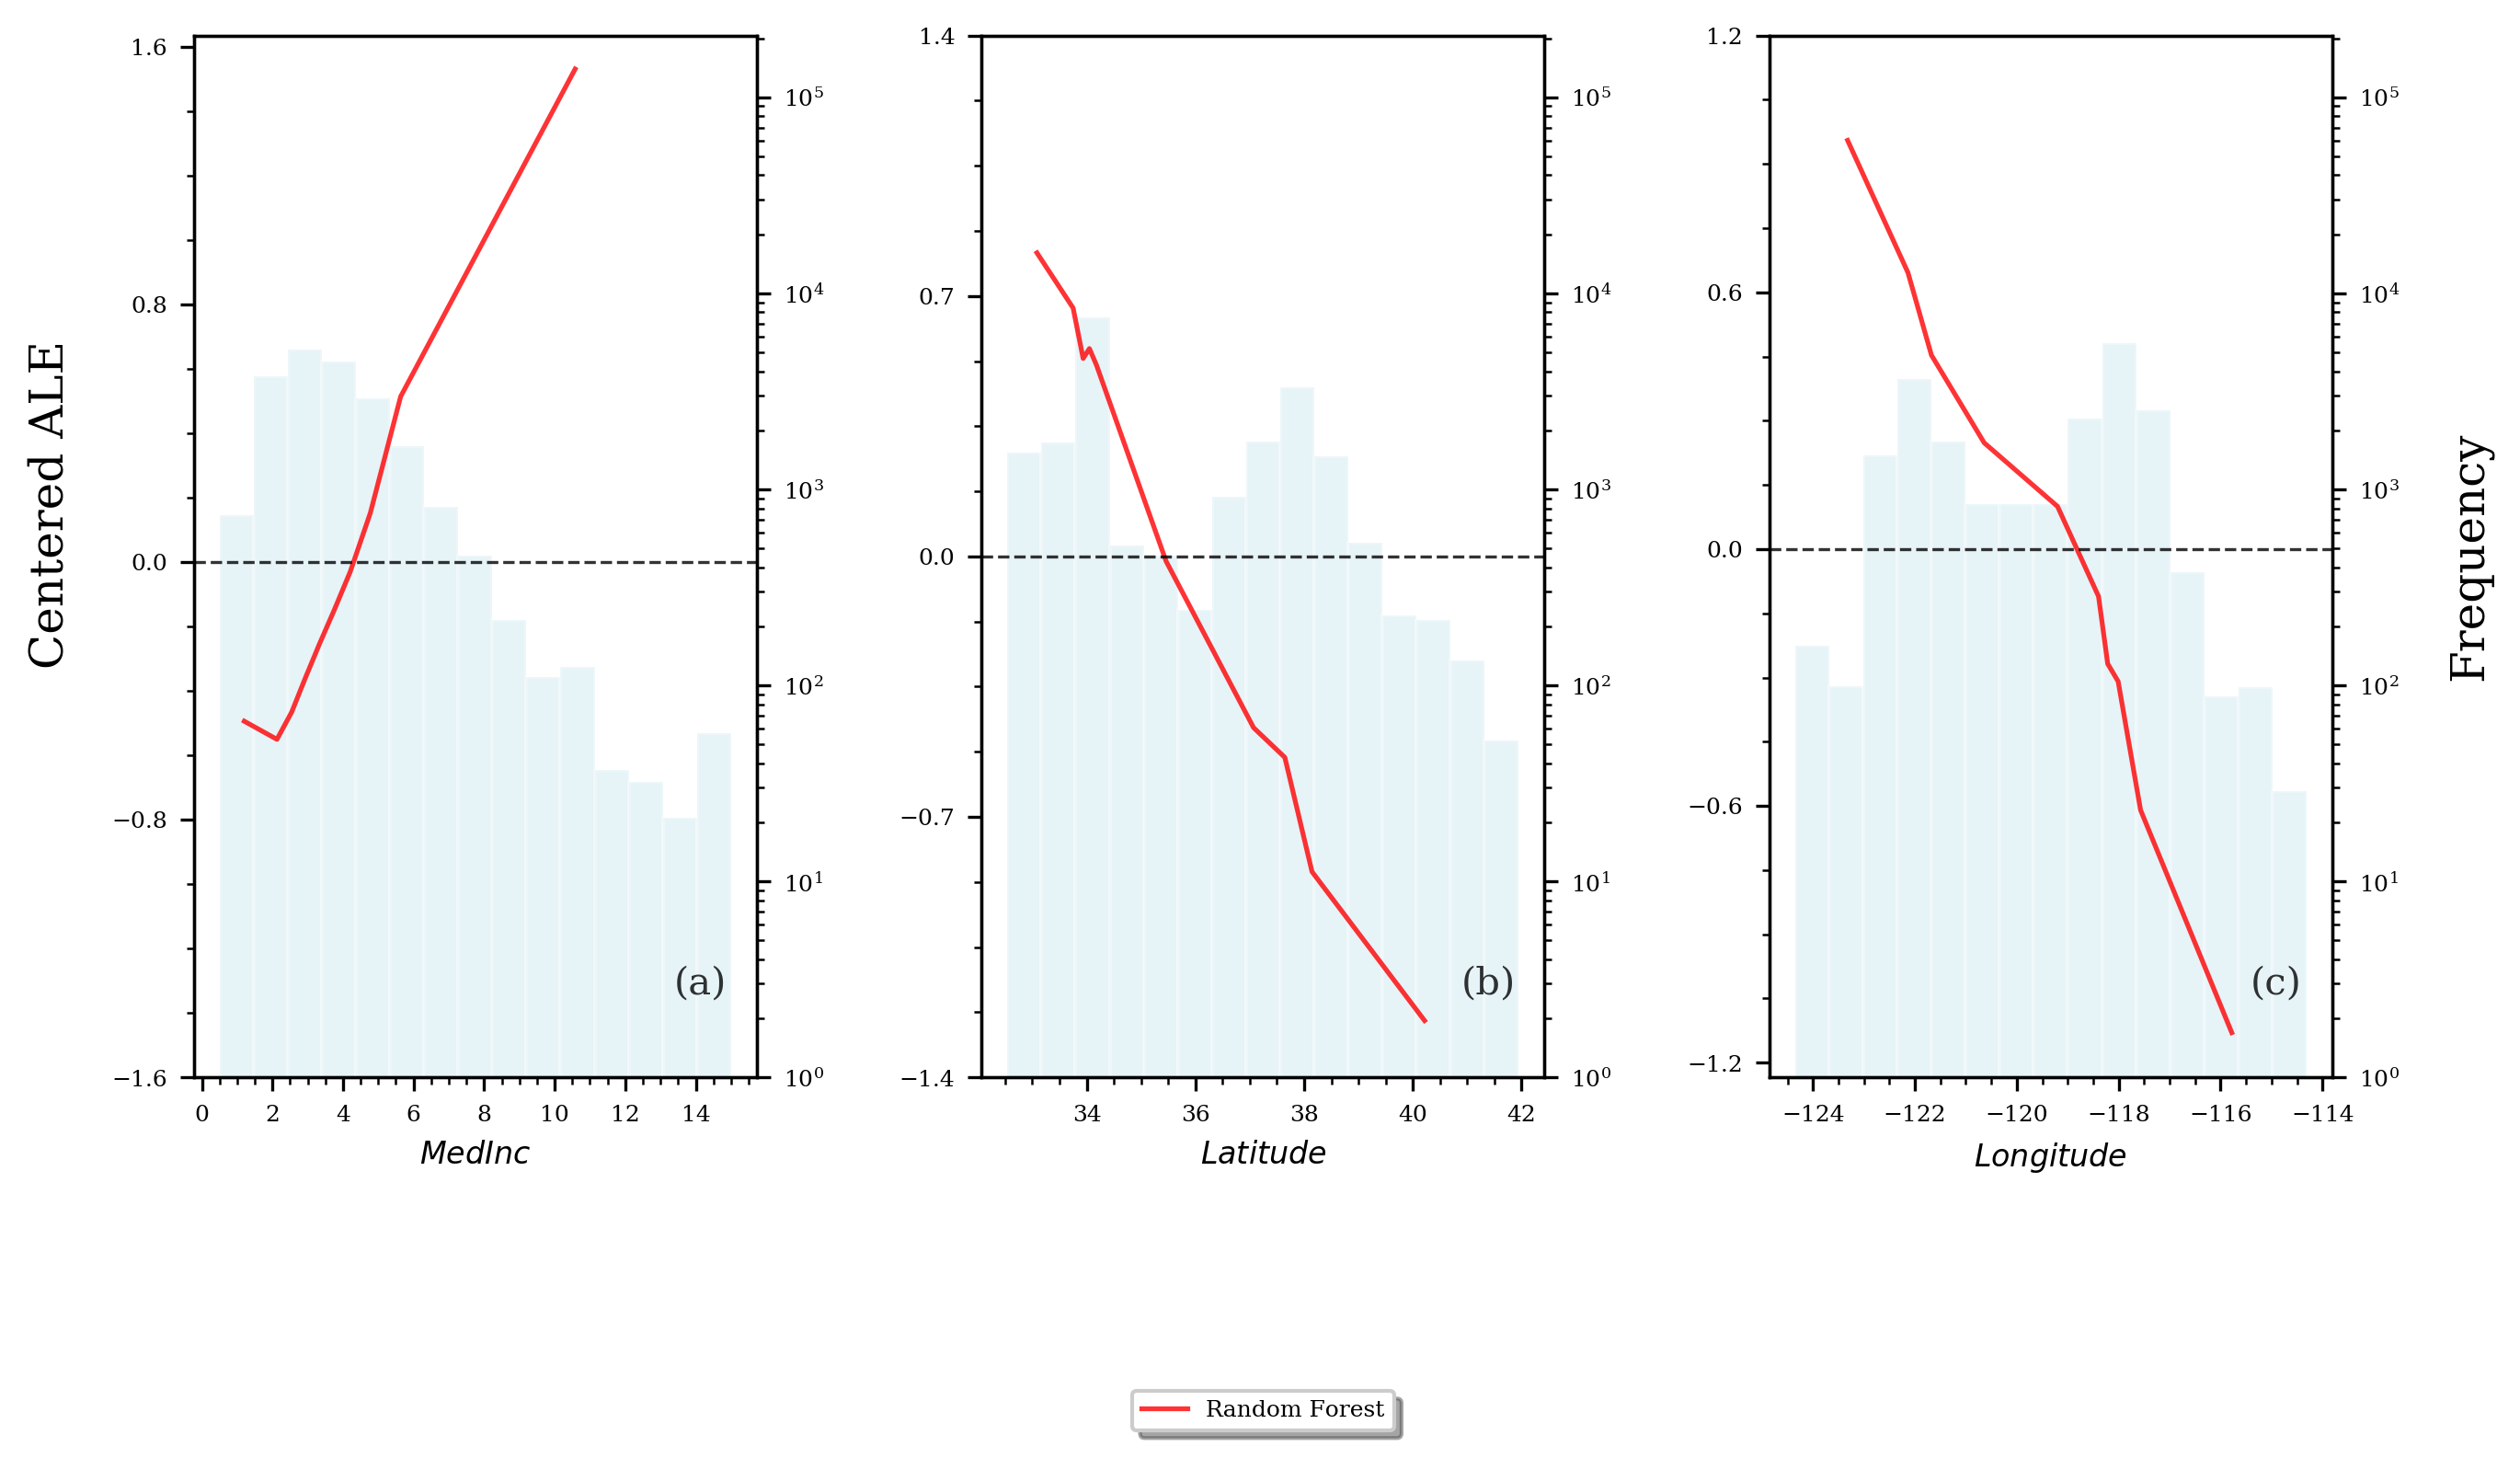

In [15]:
important_vars = ['MedInc', 'Latitude', 'Longitude',]
results = myInterpreter.calc_ale(features=important_vars, 
                                 n_bootstrap=1, 
                                 subsample=10000, 
                                 n_jobs=len(important_vars), 
                                 n_bins=10
                                )
fig, axes = myInterpreter.plot_ale()

### Computing Interaction Strength 

Using ALE, we can compute the degree to which our model exhibits strong feature interactions. If the model can be sufficiently approximated by the first-order ALE, then feature interactions are weak.

In [16]:
ias = myInterpreter.calc_interaction_strength(model_name='Random Forest', 
                                   n_bins=30, 
                                   subsample=1.0, 
                                   n_jobs=10, 
                                   n_bootstrap=1,
                                   ale_subsample=1.0)
print(ias)

[0.65354115]


In [17]:
print(ias)

[0.65354115]
